# Ex2

In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from utils import *
import skimage
from skimage import transform
import matplotlib
import importlib

In [2]:
def toggle(mode):
    """
    Fonction pour changer de mode d'affichage des images
        inline ==> Affichage directement dans le notebook
        tk ==> Affichage dans une fenêtre à part (permet de sélectionner des points sur l'image)
    """
    if mode == "tk":
        plt.close('all')
        matplotlib.use('TkAgg', force=True)
        importlib.reload(plt)
        plt.switch_backend('TkAgg')
    elif mode == "inline":
        plt.close('all')
        matplotlib.use('Agg', force=True)
        importlib.reload(plt)
        plt.switch_backend('Agg')
        %matplotlib inline

In [3]:
camera = data.camera()
oggy_salon = skimage.io.imread('images/oggy_salon.jpg')

### Q1

In [4]:
hauteur, largeur = camera.shape
xhg, yhg = 0, 0
xhd, yhd = largeur, 0
xbd, ybd = largeur, hauteur
xhg, ybg = 0, hauteur

coinsI = np.array([
    [xhg, yhg],
    [xhd, yhd],
    [xbd, ybd],
    [xhg, ybg],
])

### Q2

In [5]:
toggle("tk")
# sélectionner les coins du cadre
coinsO = np.array(select_corners(oggy_salon))

### Q3

In [6]:
tform = transform.estimate_transform('projective', coinsI, coinsO)
H = tform.params

### Q4

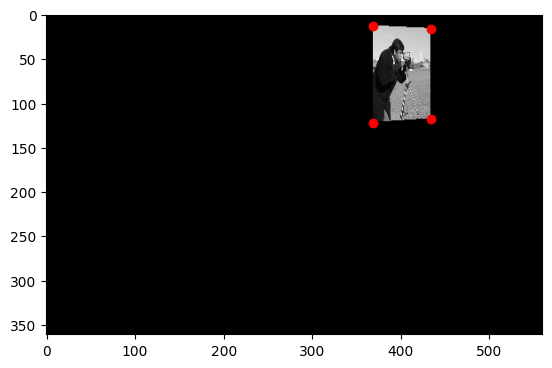

In [7]:
camera_warped = transformer(camera, H, hw=oggy_salon.shape)
toggle("inline")
plt.imshow(camera_warped, cmap='gray')
plt.scatter(coinsO[:, 0], coinsO[:, 1], c='r')
plt.show()

### Q5

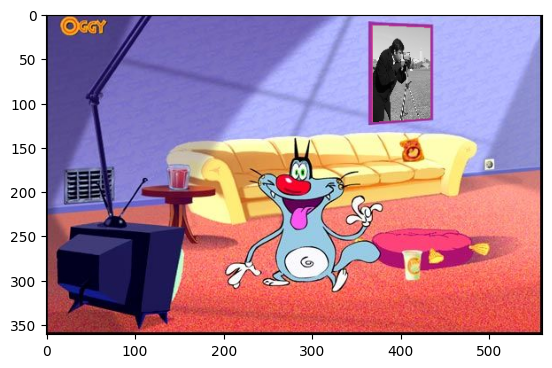

In [8]:
oggy_incrusted = oggy_salon.copy()
camera_warped_3channels = np.stack([camera_warped]*3, axis=-1)
oggy_incrusted[camera_warped_3channels > 0] = camera_warped_3channels[camera_warped_3channels > 0]
    
plt.imshow(oggy_incrusted)
plt.show()

### Question Bonus

can't invoke "event" command: application has been destroyed
    while executing
"event generate $w <<ThemeChanged>>"
    (procedure "ttk::ThemeChanged" line 6)
    invoked from within
"ttk::ThemeChanged"


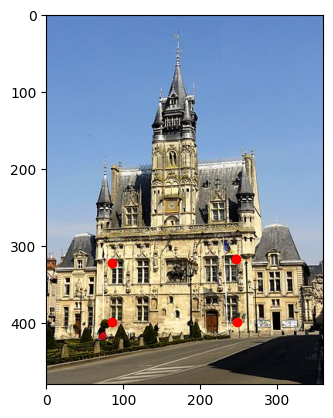

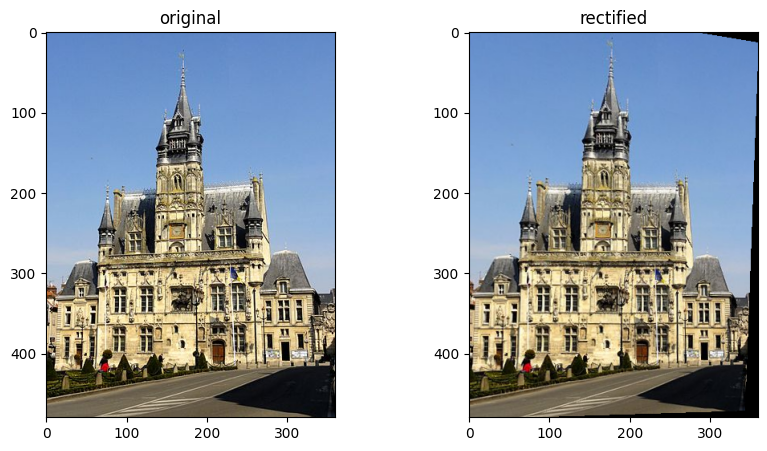

In [9]:
compi = skimage.io.imread('images/360px-Comp.jpg')

toggle("tk")
# selectionner quatre points devant former un rectangle une fois l'image corrigée
coinsO = np.array(select_corners(compi))

toggle("inline")
plt.imshow(compi, cmap='gray')
plt.scatter(coinsO[:, 0], coinsO[:, 1], c='r')
plt.show()

hg, hd, bd, bg = coinsO

xd = np.mean([hd[0], bd[0]])
xg = np.mean([hg[0], bg[0]])
yh = np.mean([hg[1], hd[1]])
yb = np.mean([bg[1], bd[1]])

coinsI = np.array([
    [xg, yh],
    [xd, yh],
    [xd, yb],
    [xg, yb],
])

tform = transform.estimate_transform('projective', coinsO, coinsI)
H = tform.params

compi_rectified = compi.copy()

# transformer() est fait pour des images en niveaux de gris
# on fait donc la transformation pour chaque canal
for i in range(compi.shape[2]):
    compi_rectified[:, :, i] = transformer(compi[:, :, i], H, compi.shape[:2])

two_plots("original", compi, "rectified", compi_rectified, cmap1=None, cmap2=None)